In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal']=data.target

In [ ]:
print(f"Dataset shape: {df.shape}")
print(f"columns: {list(df.columns)}")
print(f"Dataset structure: {df.describe}")

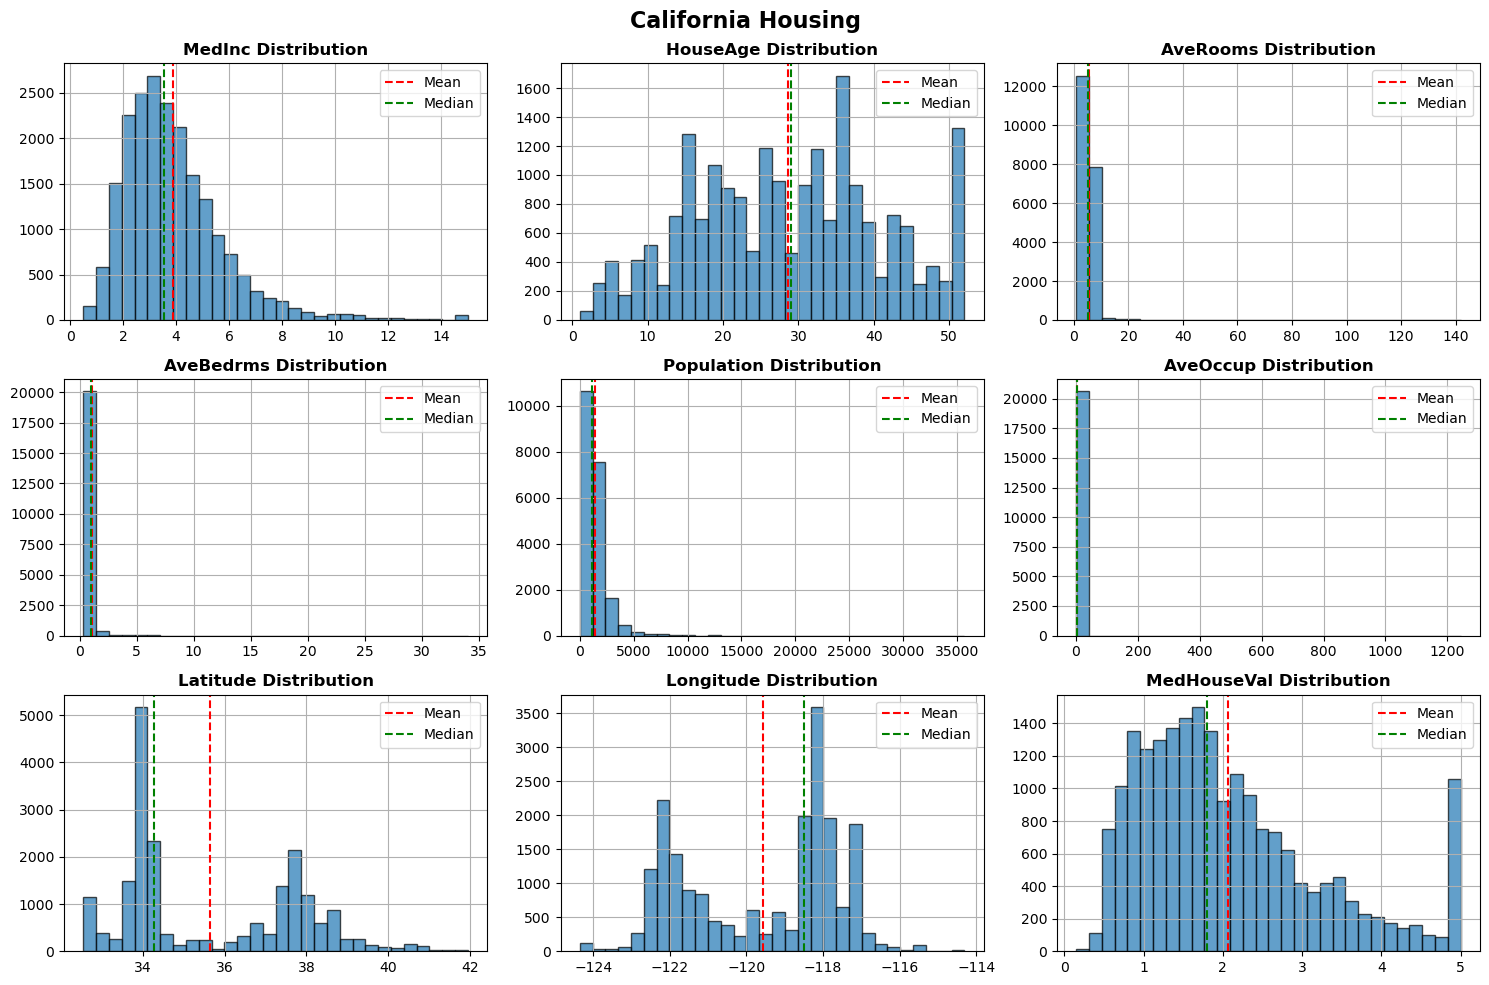

In [17]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
fig.suptitle('California Housing', fontsize=16, fontweight='bold')

for ax, col in zip(axes.flatten(), df.columns):
    df[col].hist(bins=30, ax=ax, alpha=0.7, edgecolor='black')
    ax.axvline(df[col].mean(), color='red', label='Mean', linestyle='--')
    ax.axvline(df[col].median(), color='green', label='Median', linestyle='--')
    ax.set_title(f'{col} Distribution', fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

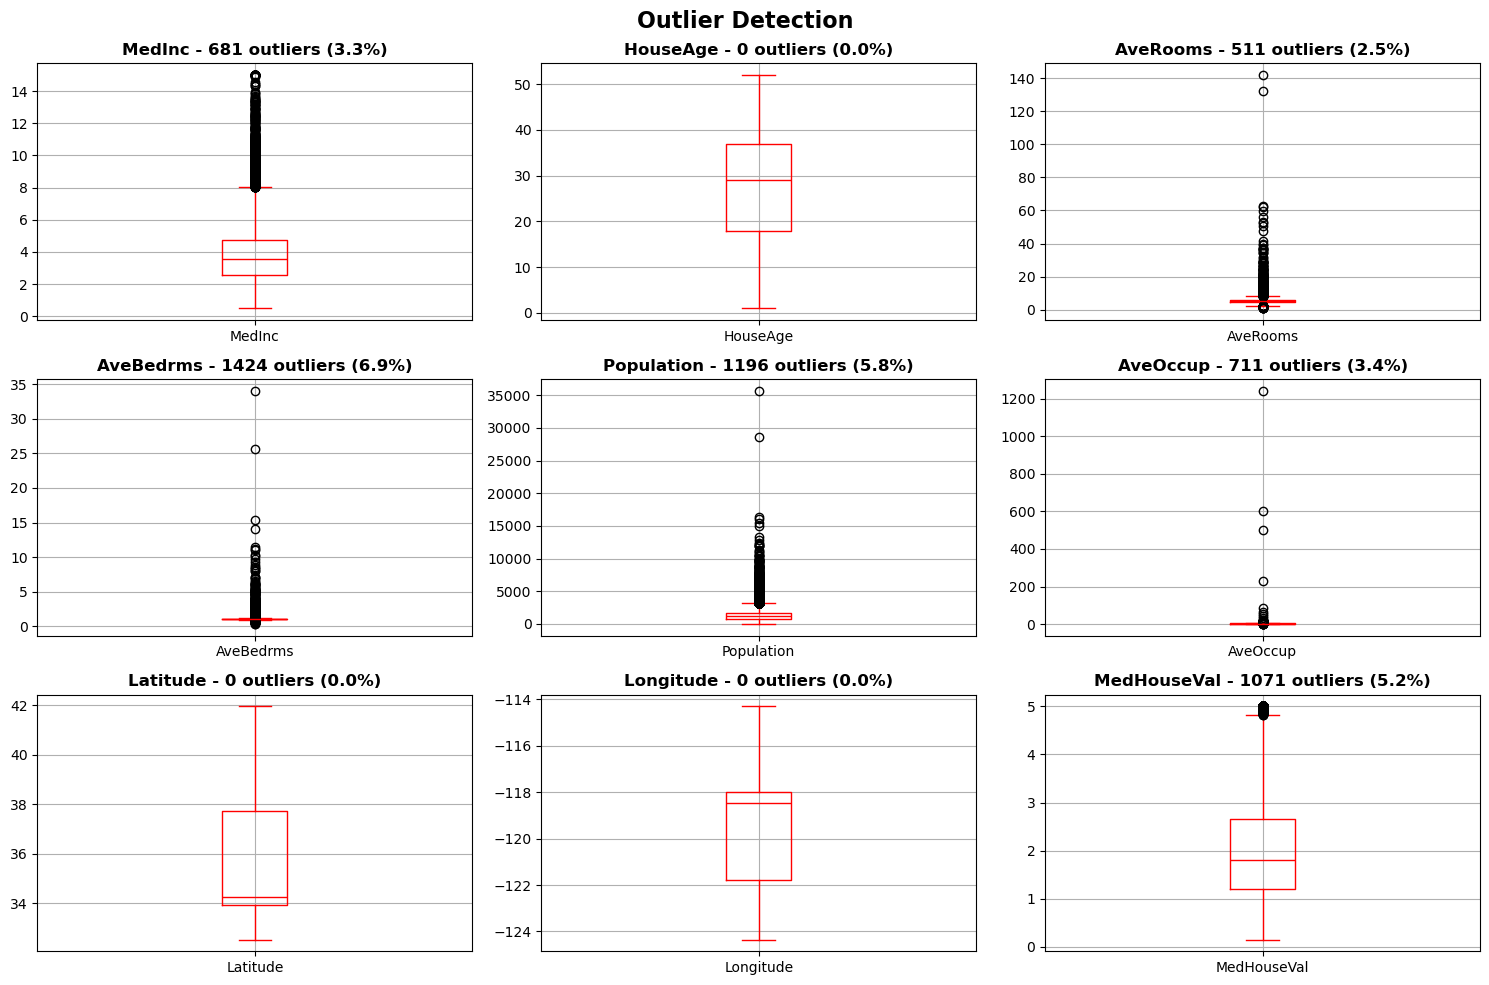

In [23]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
fig.suptitle("Outlier Detection", fontweight='bold', fontsize=16)

for ax,col in zip(axes.flatten(), df.columns):
    df.boxplot(column=col, ax=ax, color='red')

    Q1, Q3 = df[col].quantile([0.25,0.75])
    IQR = Q3-Q1
    outliers = df[(df[col] < (Q1 - 1.5*IQR)) | (df[col] > (Q3 + 1.5*IQR))]
    ax.set_title(f"{col} - {len(outliers)} outliers ({len(outliers)/len(df):.1%})", fontweight='bold')

plt.tight_layout()
plt.show()